/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


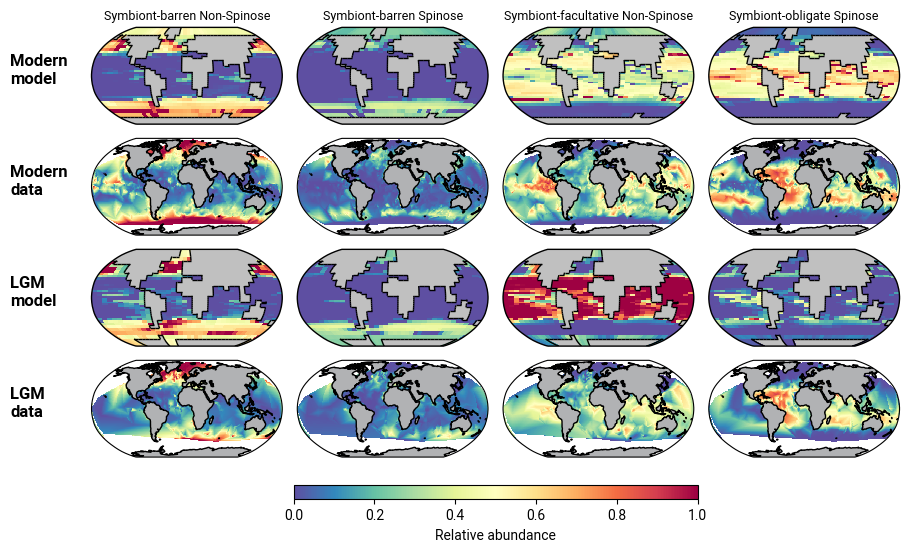

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.transforms as mtransforms

from cgeniepy.foram import ForamModel as fm
from cgeniepy.plot import scatter_map

plt.rcParams["font.family"] = "Roboto"

fig, axes = plt.subplots(nrows=4, ncols=4,
                         figsize=(9, 6),
                         subplot_kw=dict(projection=ccrs.Robinson()))

# OBSERVATION DATA
forcens = pd.read_csv("~/foram_core/tidy/forcens_fg_r_tidy.csv")
lgm = pd.read_csv("~/foram_core/tidy/lgm_fg_r_tidy.csv")

# MODELS
mod_pi = fm("../model/test_pi")
mod_lgm = fm("../model/test_lgm")

## letters = list(map(chr, range(97, 97+4))) #97 is "a"
letters = ['Modern\nmodel', 'Modern\ndata', 'LGM\nmodel', 'LGM\ndata']
name_list = ["bn", "bs", "sn", "ss"]
longname_list = ["Symbiont-barren Non-Spinose",
                 "Symbiont-barren Spinose",
                 "Symbiont-facultative Non-Spinose",
                 "Symbiont-obligate Spinose"]

for i, ax in enumerate(axes.flat):
    #labelling
    if i%4 == 0:
        trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
        ax.text(-0.5, 0.5, letters[i//4], transform=ax.transAxes + trans, weight="bold", fontsize=12)
    if i < 4:
        # plot modern model
        index = i
        p = mod_pi.select_foramtype(name_list[index]).relative_abundance(threshold=0).take(-1,axis=0).plot_map(ax=ax, vmin=0, vmax=1, cmap="Spectral_r", colorbar=False)
        ax.set_title(longname_list[i], fontsize=9)
    elif i < 8:
        # forcens data
        index = i-4
        forcens_subset = forcens[['Latitude','Longitude',longname_list[index]]]
        scatter_map(ax=ax, df=forcens_subset, var=longname_list[index], vmin=0, vmax=1, interpolate="linear", cmap="Spectral_r")
    elif i < 12:
        # plot modern model
        index = i - 8
        p = mod_lgm.select_foramtype(name_list[index]).relative_abundance(threshold=0).take(-1,axis=0).plot_map(ax=ax, vmin=0, vmax=1, cmap="Spectral_r", colorbar=False)
    elif i < 16:
        # margo data
        index = i-12
        lgm_subset = lgm[['Latitude','Longitude',longname_list[index]]]
        scatter_map(ax=ax, df=lgm_subset, var=longname_list[index], vmin=0, vmax=1, interpolate="linear", cmap="Spectral_r")

fig.tight_layout()
cbar = fig.colorbar(p, ax=axes.flatten().tolist(),orientation="horizontal", pad=0.05, aspect=30, shrink=0.5)
cbar.set_label("Relative abundance")
fig.savefig("../output/lgm_biogeographic_change.png", dpi=400, bbox_inches='tight')